In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/lung1.csv')

In [14]:
# How many datapoints do we have and how complete are they?
print(f'Number of rows in the data: {len(data)}')
print(f'Number of rows with no missing values: {len(data.dropna(axis=0, how="any"))}')
print('Number of missing values in each column:')
print(data.apply(pd.isna, axis=1).agg('sum', axis=0))


Number of rows in the data: 422
Number of rows with no missing values: 365
Number of missing values in each column:
PatientID            0
age                 22
clinical.T.Stage     1
Clinical.N.Stage     0
Clinical.M.Stage     0
Overall.Stage        1
Histology           42
gender               0
Survival.time        0
deadstatus.event     0
dtype: int64


In [3]:
# What kind of columns do we have?
print('List of numeric columns:')
print(list(data.select_dtypes(include=[np.number]).columns))

print('List of non-numeric columns:')
non_numerics = list(data.select_dtypes(exclude=[np.number]).columns)
print(non_numerics)

List of numeric columns:
['age', 'clinical.T.Stage', 'Clinical.N.Stage', 'Clinical.M.Stage', 'Survival.time', 'deadstatus.event']
List of non-numeric columns:
['PatientID', 'Overall.Stage', 'Histology', 'gender']


(<Figure size 288x648 with 6 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>],
 {'age': (array([ 1.,  0.,  5.,  8., 18., 27., 39., 45., 57., 55., 48., 55., 27.,
          11.,  4.]),
   array([33.6849 , 37.55286, 41.42082, 45.28878, 49.15674, 53.0247 ,
          56.89266, 60.76062, 64.62858, 68.49654, 72.3645 , 76.23246,
          80.10042, 83.96838, 87.83634, 91.7043 ]),
   <BarContainer object of 15 artists>),
  'clinical.T.Stage': (array([ 93.,   0., 156.,   0.,   0.,  53.,   0., 117.,   0.,   2.]),
   array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
   <BarContainer object of 10 artists>),
  'Clinical.N.Stage': (array([170.,   0.,  23.,   0.,   0., 141.,   0.,  85.,   0.,   3.]),
   array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
   <BarContainer object of 10 artists>),
  'Clinical.M.Stage': (array([417.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   4.]),
   array([0. , 0.3, 0.6, 0

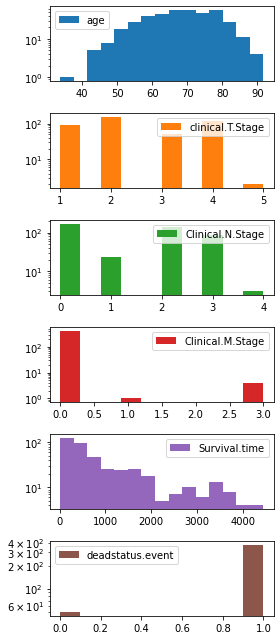

In [4]:
# What's in the numeric columns?
from swat4ls.util import make_hists

make_hists(data.select_dtypes(include=[np.number]))

In [5]:
# Any further general information about the columns
data.describe()

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,deadstatus.event
count,400.000000,421.000000,422.000000,422.000000,422.000000,422.000000
mean,68.036500,2.475059,1.355450,0.030806,988.857820,0.883886
std,10.083498,1.130727,1.218116,0.294847,1035.567789,0.320742
min,33.684900,1.000000,0.000000,0.000000,10.000000,0.000000
25%,61.234800,2.000000,0.000000,0.000000,261.000000,1.000000
50%,68.583400,2.000000,2.000000,0.000000,545.500000,1.000000
75%,75.814475,4.000000,2.000000,0.000000,1397.000000,1.000000
max,91.704300,5.000000,4.000000,3.000000,4454.000000,1.000000


In [24]:
# What kind of data is in the non-numeric columns?
print('Number of unique values in non-numeric columns:')
print(data[non_numerics].agg([
    lambda x: len(x.unique()), 
]))
print()
print('what these unique values look like (truncated for readability):')
for col in data[non_numerics].columns:
    print(f'{col}:')
    print(list(data[col][:10]))

Number of unique values in non-numeric columns:
          PatientID  Overall.Stage  Histology  gender
<lambda>        422              5          5       2

what these unique values look like (truncated for readability):
PatientID:
['LUNG1-001', 'LUNG1-002', 'LUNG1-003', 'LUNG1-004', 'LUNG1-005', 'LUNG1-006', 'LUNG1-007', 'LUNG1-008', 'LUNG1-009', 'LUNG1-010']
Overall.Stage:
['IIIb', 'I', 'IIIb', 'II', 'IIIb', 'IIIa', 'IIIa', 'IIIa', 'IIIa', 'IIIb']
Histology:
['large cell', 'squamous cell carcinoma', 'large cell', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'adenocarcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma']
gender:
['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female']


In [28]:
# How many times we see the individual values in each columns:
for col in data[non_numerics].columns:
    print(f'{col}:')
    print(data[col].value_counts().sort_values(ascending=False)[:10])
    print()

PatientID:
LUNG1-001    1
LUNG1-053    1
LUNG1-004    1
LUNG1-005    1
LUNG1-006    1
LUNG1-007    1
LUNG1-008    1
LUNG1-009    1
LUNG1-010    1
LUNG1-011    1
Name: PatientID, dtype: int64

Overall.Stage:
IIIb    176
IIIa    112
I        93
II       40
Name: Overall.Stage, dtype: int64

Histology:
squamous cell carcinoma    152
large cell                 114
nos                         63
adenocarcinoma              51
Name: Histology, dtype: int64

gender:
male      290
female    132
Name: gender, dtype: int64

